In [1]:
import pandas as pd
import numpy as np

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# filename1 = "/content/gdrive/MyDrive/fucking_paper/dataset/cleaning_data_food.csv"
# df = pd.read_csv(filename1, encoding='utf-8').reset_index(drop=True)
filename2 = "/content/gdrive/MyDrive/fucking_paper/dataset/20191226reviews.csv"
df = pd.read_csv(filename2, encoding='utf-8').reset_index(drop=True)

In [ ]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
df.shape

(67986, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [4]:
df = df.drop(['asin', 'name', 'rating', 'date', 'verified','helpfulVotes'], axis = 1)
# df = df.drop(['reviewerID', 'asin', 'helpful', 'overall',
#        'reviewTime', 'numerator', 'denominator', 'percentage', 'segement',
#        'lemm_reviewText', 'review_clean_punc', 'summary_clean_punc',
#        'review_clean', 'summary_clean'], axis = 1)


In [ ]:
df.isnull().sum()

title    14
body     21
dtype: int64

In [21]:
df = df.dropna()
df = df.reset_index(drop = True)
df.shape

(67956, 2)

In [ ]:
df.head()

,title,body
0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [9]:
import re
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords

In [18]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [19]:
def clean_data(content, remove_stopwords = True):
  content = content.lower()
  content = content.split()
  new_content= []
  
  for word in content:
    if word in contractions:
      new_content.append(contractions[word])
    else:
      new_content.append(word)
  content = " ".join(new_content)

  content = re.sub(r'https?:\/\/.*[\r\n]*', '', content, flags=re.MULTILINE)
  content = re.sub(r'&amp;', '', content) 
  content = re.sub(r'\<a href', ' ', content)
  content = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', content)
  content = re.sub(r'<br />', ' ', content)
  content = re.sub(r'\'', ' ', content)
  
  if remove_stopwords:
    content = content.split()
    content = [word for word in content if not word in set(stopwords.words('english'))]  
    content = ' '.join(content)
   
  return content


In [ ]:
clean_data(df['body'][101], remove_stopwords =True)

'let preface review disclaimer techie tycoon needs continual internet access lest global market crash need basic phone want bells whistles replaced basic lg cell phone alias2 recommendation friend immediately liked heftier feel easier read displays though swiftly changed rather twee hard figure menu page pros love dedicated keys voicemail bluetooth voice menus rotating keypad cool words though send many texts use notepad time qwerty keyboard easy use even fingernails nice know check email internet access necessary though probably never camera great like editing options pictures screen size generous easy see especially landscape mode easy use sound quality good nice long life battery charge cons default backgrounds though easy enough change functions difficult find menus found voicemail key find vm menu ring loud enough heard phone jacket pocket never found phone loud enough ring button outside light display check time open phone eta yes takes seconds display light duh phone good choice

In [22]:
clean_texts = []
# for text in df.reviewText:
for text in df.body:
    clean_texts.append(clean_data(text))
print("Texts are complete.")

Texts are complete.


In [5]:
import pickle

In [23]:
# with open('/content/gdrive/My Drive/Colab Notebooks/text_amazon.data', "wb") as fp:  
#   pickle.dump(clean_texts, fp)

In [24]:
with open('/content/gdrive/MyDrive/Colab Notebooks/text_amazon.data', 'rb') as filehandle:
    # store the data as binary data stream
    clean_texts = pickle.load(filehandle)

In [ ]:
clean_summaries = []
# for summary in df.summary:
for summary in df.title:
    clean_summaries.append(clean_data(summary, remove_stopwords=False))
print("Summaries are complete.")

Summaries are complete.


In [ ]:
# with open('/content/gdrive/My Drive/Colab Notebooks/summary_amazon.data', "wb") as fp:  
#   pickle.dump(clean_summaries, fp)

In [11]:
with open('/content/gdrive/My Drive/Colab Notebooks/summary_amazon.data', 'rb') as filehandle:
    # store the data as binary data stream
    clean_summaries = pickle.load(filehandle)

In [25]:
for i in range(3):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i],'\n')

Clean Review # 1
def not best  but not worst
samsung a600 awhile absolute doo doo read review detect rage stupid thing finally died used nokia phone bought garage sale 1 wonder sold cheap bad > hate menu takes forever get want scroll endlessly usually phones numbered categories u simply press get want go > pain put silent vibrate class rings turn immediately fast way silence damn thing always remember put silent learned hard way > true case mission get break ur nails process also damage case time u try reason phone started giving problems succeed opening > buttons could bit bigger vibration could stronger good > reception shabby using elevator remarkable feat considering old phone would lose service simply putting pocket > compared old samsung phone works quite well ring tones loud enough hear phone actually charges quickly great battery life heat like potatoe oven either long phone convos > nice bright large screen > cute ways customize scroll bar set purple pink aqua orange etc overa

In [26]:
def count_words(count_dict, text):
  for sentence in text:
    for word in sentence.split():
      if word not in count_dict:
        count_dict[word] = 1
      else:
        count_dict[word] += 1

In [27]:
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 38182


In [28]:
import matplotlib.pyplot as plt

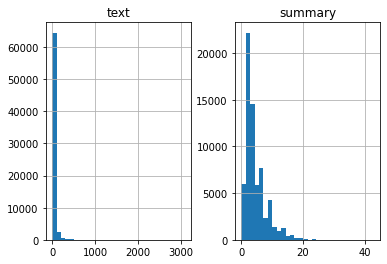

In [29]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in clean_texts:
      text_word_count.append(len(i.split()))

for i in clean_summaries:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
#We can fix the maximum length of the summary to 13 since that seems to be the majority summary length.

In [ ]:
cnt=0
for i in clean_summaries:
    if(len(i.split())<=20):
        cnt=cnt+1
print(cnt/len(clean_summaries)*100)

99.69244805462358


In [ ]:
cnt=0
for i in clean_texts:
    if(len(i.split())<=250):
        cnt=cnt+1
print(cnt/len(clean_texts)*100)

98.79775148625582


In [32]:
max_text_length = 200
max_summary_length = 20

In [33]:
sorted_summaries = []
sorted_texts = []

for i in range(len(clean_texts)):
  if(len(clean_summaries[i].split())<=max_summary_length and len(clean_texts[i].split())<=max_text_length):
    sorted_summaries.append(clean_summaries[i])
    sorted_texts.append(clean_texts[i])

print(len(sorted_summaries))
print(len(sorted_texts))
    

66542
66542


In [34]:
sorted_summaries = list(map(lambda x: 'starttok '+ x + ' endtok', sorted_summaries))

In [ ]:
type(clean_summaries)

list

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(np.array(sorted_texts),np.array(sorted_summaries), test_size = 0.1, random_state=0)

In [36]:
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

In [ ]:
## Text Tokenizer

In [ ]:
# threshold = 3       #assumed

# count = 0
# total_count = 0
# frequency = 0
# total_frequency = 0

# for key,value in x_tokenizer.word_counts.items():
#   total_count = total_count + 1
#   total_frequency = total_frequency + value
#   if(value < threshold):
#     count = count + 1
#     frequency = frequency + value

# print("% of rare words in vocabulary:",(count/total_count)*100)
# print("Total Coverage of rare words:",(frequency/total_frequency)*100)


% of rare words in vocabulary: 65.64543246777508
Total Coverage of rare words: 6.0111193369042955


In [37]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

#convert text sequences into integer sequences
x_train = x_tokenizer.texts_to_sequences(x_train)
x_test = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_train = pad_sequences(x_train, maxlen = max_text_length, padding='post')
x_test = pad_sequences(x_test, maxlen = max_text_length, padding='post')

text_vocab_size = len(x_tokenizer.word_index) + 1
print(text_vocab_size)

29781


In [ ]:
## Summary Tokenizer

In [ ]:
# #prepare a tokenizer for reviews on training data
# y_tokenizer = Tokenizer()
# y_tokenizer.fit_on_texts(list(y_train))

In [ ]:
# threshold = 7

# count = 0
# total_count = 0
# frequency = 0
# total_frequency = 0

# for key,value in y_tokenizer.word_counts.items():
#   total_count = total_count + 1
#   total_frequency = total_frequency + value
#   if(value < threshold):
#     count = count + 1
#     frequency = frequency + value

# print("% of rare words in vocabulary:",(count/total_count)*100)
# print("Total Coverage of rare words:",(frequency/total_frequency)*100)


% of rare words in vocabulary: 86.32696390658174
Total Coverage of rare words: 14.497414810894435


In [38]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

#convert text sequences into integer sequences
y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

#padding zero upto maximum length
y_train = pad_sequences(y_train, maxlen = max_summary_length, padding='post')
y_test = pad_sequences(y_test, maxlen = max_summary_length, padding='post')

summary_vocab_size = len(y_tokenizer.word_index) + 1
print(summary_vocab_size)

9379


In [26]:
y_tokenizer.word_counts["starttok"],len(y_train)

(59887, 59887)

In [ ]:
#deleting the rows that contain only 'starttok' and 'endtok'

In [39]:
ind=[]
for i in range(len(y_train)):
    count=0
    for j in y_train[i]:
        if j!=0:
            count=count+1
    if(count==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
x_train=np.delete(x_train,ind, axis=0)

In [40]:
ind=[]
for i in range(len(y_test)):
    count=0
    for j in y_test[i]:
        if j!=0:
            count=count+1
    if(count==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
x_test=np.delete(x_test,ind, axis=0)

In [41]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

In [42]:
class AttentionLayer(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
      assert isinstance(input_shape, list)
      # Create a trainable weight variable for this layer.
      self.W_a = self.add_weight(name='W_a',
                    shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                    initializer='uniform',
                    trainable=True)
      self.U_a = self.add_weight(name='U_a',
                    shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                    initializer='uniform',
                    trainable=True)
      self.V_a = self.add_weight(name='V_a',
                    shape=tf.TensorShape((input_shape[0][2], 1)),
                    initializer='uniform',
                    trainable=True)

      super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
      """
      inputs: [encoder_output_sequence, decoder_output_sequence]
      """
      assert type(inputs) == list
      encoder_out_seq, decoder_out_seq = inputs

      logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
      logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

      def energy_step(inputs, states):
        """ Step function for computing energy for a single decoder state
        inputs: (batchsize * 1 * de_in_dim)
        states: (batchsize * 1 * de_latent_dim)
        """

        logger.debug("Running energy computation step")

        if not isinstance(states, (list, tuple)):
          raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

        encoder_full_seq = states[-1]

        """ Computing S.Wa where S=[s0, s1, ..., si]"""
        # <= batch size * en_seq_len * latent_dim
        W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

        """ Computing hj.Ua """
        U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

        logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

        """ tanh(S.Wa + hj.Ua) """
        # <= batch_size*en_seq_len, latent_dim
        Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

        logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

        """ softmax(va.tanh(S.Wa + hj.Ua)) """
        # <= batch_size, en_seq_len
        e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
        # <= batch_size, en_seq_len
        e_i = K.softmax(e_i)

        logger.debug(f"ei.shape = {e_i.shape}")

        return e_i, [e_i]

      def context_step(inputs, states):
        """ Step function for computing ci using ei """

        logger.debug("Running attention vector computation step")

        if not isinstance(states, (list, tuple)):
          raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

        encoder_full_seq = states[-1]

        # <= batch_size, hidden_size
        c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

        logger.debug(f"ci.shape = {c_i.shape}")

        return c_i, [c_i]

      # we don't maintain states between steps when computing attention
      # attention is stateless, so we're passing a fake state for RNN step function
      fake_state_c = K.sum(encoder_out_seq, axis=1)
      fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

      """ Computing energy outputs """
      # e_outputs => (batch_size, de_seq_len, en_seq_len)
      last_out, e_outputs, _ = K.rnn(
          energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
      )

      """ Computing context vectors """
      last_out, c_outputs, _ = K.rnn(
          context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
      )

      return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
      """ Outputs produced by the layer """
      return [
          tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
          tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
      ]

In [43]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
# !cp "/content/gdrive/My Drive/Colab Notebooks/attention_layer.py" .
# from attention_layer import AttentionLayer
# from tensorflow.keras.layers import Attention

In [44]:
path_to_glove_file = "/content/gdrive/MyDrive/fucking_paper/dataset/glove.6B.200d.txt"

In [45]:
embeddings_index = {}
with open(path_to_glove_file) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [46]:
embedding_matrix = np.zeros((text_vocab_size,200))
for word,i in x_tokenizer.word_index.items():
    embedding_value = embeddings_index.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

In [47]:
K.clear_session()
latent_dim = 256
embedding_dim = 200
dropout_value = 0.3
# latent_dim = 200

#Encoder 
encoder_inputs = Input(shape = (max_text_length,))

#embedding layer
enc_emb = Embedding(text_vocab_size, embedding_dim, weights=[embedding_matrix], trainable = True)(encoder_inputs)

#LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=dropout_value,recurrent_dropout=dropout_value)
encoder_output1, state_h1, state_c1 = encoder = encoder_lstm1(enc_emb)

#LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=dropout_value,recurrent_dropout=dropout_value)
encoder_output2, state_h2, state_c2 = encoder = encoder_lstm2(encoder_output1)

#LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=dropout_value,recurrent_dropout=dropout_value)
encoder_outputs, state_h, state_c = encoder = encoder_lstm3(encoder_output2)

In [48]:
#Set up decoder
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(text_vocab_size, embedding_dim, weights=[embedding_matrix], trainable = True)
# dec_emb_layer = Embedding(summary_vocab_size, latent_dim, weights=[embedding_matrix], trainable = True)
dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences = True, return_state = True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
# attn_out, attn_states = Attention()([encoder_outputs, decoder_outputs]) 


#Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs,attn_out])

#Dense Layer
decoder_dense = TimeDistributed(Dense(summary_vocab_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 200)     5956200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 200, 256),   467968      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
#using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.

In [49]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
#model will stop training once the validation loss increases:

In [50]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
#training the model on a batch size of 128

In [51]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape((y_train.shape[0],y_train.shape[1], 1))[:,1:] ,epochs=40,callbacks=[es],batch_size=128, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/40
 11/468 [..............................] - ETA: 26:59 - loss: 5.1988

KeyboardInterrupt: ignored

In [49]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
target_word_index

{'starttok': 1,
 'endtok': 2,
 'great': 3,
 'good': 4,
 'taste': 5,
 'love': 6,
 'product': 7,
 'best': 8,
 'delicious': 9,
 'flavor': 10,
 'excellent': 11,
 'tasty': 12,
 'like': 13,
 'yummy': 14,
 'price': 15,
 'favorite': 16,
 'nice': 17,
 'healthy': 18,
 'snack': 19,
 'stuff': 20,
 'wonderful': 21,
 'quality': 22,
 'really': 23,
 'better': 24,
 'yum': 25,
 'use': 26,
 'perfect': 27,
 'easy': 28,
 'make': 29,
 'tea': 30,
 'ever': 31,
 'fresh': 32,
 'awesome': 33,
 'sweet': 34,
 'free': 35,
 'buy': 36,
 'one': 37,
 'coffee': 38,
 'value': 39,
 'go': 40,
 'ok': 41,
 'get': 42,
 'cup': 43,
 'pretty': 44,
 'work': 45,
 'mix': 46,
 'little': 47,
 'sugar': 48,
 'much': 49,
 'food': 50,
 'bad': 51,
 'gluten': 52,
 'fantastic': 53,
 'deal': 54,
 'tasting': 55,
 'treat': 56,
 'way': 57,
 'bag': 58,
 'flour': 59,
 'cook': 60,
 'expensive': 61,
 'glutenfree': 62,
 'real': 63,
 'high': 64,
 'chocolate': 65,
 'low': 66,
 'brand': 67,
 'alternative': 68,
 'soup': 69,
 'bread': 70,
 'wow': 71,
 'c

In [ ]:
#Inference

In [50]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_length,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [51]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['starttok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='endtok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'endtok'  or len(decoded_sentence.split()) >= (max_summary_length-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


In [52]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['starttok']) and i!=target_word_index['endtok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [53]:
for i in range(101,200):
  print("Review #",i+1)
  print("Review:",seq2text(x_train[i]))
  print("Original summary:",seq2summary(y_train[i]))
  print("Predicted summary:",decode_sequence(x_train[i].reshape(1,max_text_length)))
  print("\n")

Review # 102
Review: personal use 
Original summary: its still only a phone 
1/1 [==============================] - 0s 86ms/step
Predicted summary:  five stars


Review # 103
Review: broke focus bought att tried save little money buying amazon bought replacement blutekusa came fast like said different box woulda came two weeks tried plug computer said device malfunctioning sent new one said second came plug wall outlet charging two days wont stop turning never buy companys 
Original summary: somethings not right with phones 
1/1 [==============================] - 0s 63ms/step
Predicted summary:  i am not happy


Review # 104
Review: si llegó tiempo 
Original summary: me agrado 
1/1 [==============================] - 0s 37ms/step
Predicted summary:  excelente


Review # 105
Review: excellent cellphone screen bright images beautiful 
Original summary: very fast 
1/1 [==============================] - 0s 40ms/step
Predicted summary:  five stars


Review # 106
Review: phone fast like super